In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency

import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

In [8]:
shark_tank = pd.read_csv('/content/Shark Tank US dataset.csv', encoding = "ISO-8859-1")

nRow, nCol = shark_tank.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')


There are 1274 rows and 50 columns in the dataset


In [9]:
shark_tank.head(10)

,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Business Description,Pitchers Gender,Pitchers City,Pitchers State,Pitchers Average Age,Entrepreneur Names,Company Website,Multiple Entrepreneurs,US Viewership,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of sharks in deal,Investment Amount Per Shark,Equity Per Shark,Royalty Deal,Loan,Barbara Corcoran Investment Amount,Barbara Corcoran Investment Equity,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present
0,1,09-Aug-09,05-Feb-10,1,1,09-Aug-09,AvaTheElephant,Health/Wellness,Ava The Elephant - Baby and Child Care,Female,Atlanta,GA,NaN,Tiffany Krumins,http://www.avatheelephant.com/,0.0,4.15,50000,15.0,333333,1,50000.0,55.0,90909.0,1.0,50000.0,55.0,NaN,NaN,50000.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
1,1,09-Aug-09,05-Feb-10,1,2,09-Aug-09,Mr.Tod'sPieFactory,Food and Beverage,Mr. Tod's Pie Factory - Specialty Food,Male,Somerset,NJ,NaN,Tod Wilson,http://whybake.com/,0.0,4.15,460000,10.0,4600000,1,460000.0,50.0,920000.0,2.0,230000.0,25.0,NaN,NaN,230000.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,230000.0,25.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
2,1,09-Aug-09,05-Feb-10,1,3,09-Aug-09,Wispots,Business Services,Wispots - Consumer Services,Male,Cary,NC,NaN,Kevin Flannery,http://www.wispots.com/,0.0,4.15,1200000,10.0,12000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
3,1,09-Aug-09,05-Feb-10,1,4,09-Aug-09,CollegeFoxesPackingBoxes,Lifestyle/Home,College Foxes Packing Boxes - Consumer Services,Male,Tampa,FL,NaN,"Nick Friedman, Omar Soliman",http://collegehunkshaulingjunk.com/,0.0,4.15,250000,25.0,1000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
4,1,09-Aug-09,05-Feb-10,1,5,09-Aug-09,IonicEar,Software/Tech,Ionic Ear - Novelties,Male,St. Paul,MN,NaN,Darrin Johnson,NaN,0.0,4.15,1000000,15.0,6666667,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
5,1,09-Aug-09,05-Feb-10,2,6,16-Aug-09,APerfectPear,Food and Beverage,A Perfect Pear - Specialty Food,Female,Napa Valley,CA,NaN,Susan Knapp,http://www.aperfectpear.com,0.0,5.59,500000,15.0,3333333,1,500000.0,50.0,1000000.0,2.0,250000.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250000.0,25.0,NaN,NaN,250000.0,25.0,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
6,1,09-Aug-09,05-Feb-10,2,7,16-Aug-09,ClassroomJams,Children/Education,Classroom Jams - Education,Male,Chicago,IL,NaN,Mark Furigay,http://www.attachnoted.com/,0.0,5.59,250000,10.0,2500000,1,250000.0,100.0,250000.0,5.0,50000.0,20.0,1.0,NaN,50000.0,20.0,50000.0,20.0,NaN,NaN,50000.0,20.0,50000.0,20.0,50000.0,20.0,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
7,1,09-Aug-09,05-Feb-10,2,8,16-Aug-09,Lifebelt,Automotive,Lifebelt - Automotive,Male,Las Vegas,NV,NaN,Robert Alison,NaN,0.0,5.59,500000,10.0,5000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
8,1,09-Aug-09,05-Feb-10,2,9,16-Aug-09,CrookedJaw,Fashion/Beauty,Crooked Jaw - Men and Women's Apparel,Male,Hollywood,CA,NaN,Craig French,http://crookedjawfashions.com/,0.0,5.59,200000,20.0,1000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
9,1,09-Aug-09,05-Feb-10,2,10,16-Aug-09,StickyNoteHolder,Lifestyle

In [11]:
shark_tank['Season Number'] = shark_tank['Season Number'].astype(pd.Int32Dtype())
shark_tank['Episode Number'] = shark_tank['Episode Number'].astype(pd.Int32Dtype())
shark_tank['Pitch Number'] = shark_tank['Pitch Number'].astype(pd.Int32Dtype())

shark_tank['Startup Name'] = shark_tank['Startup Name'].astype(str)
shark_tank['Industry'] = shark_tank['Industry'].astype(str)
shark_tank['Business Description'] = shark_tank['Business Description'].astype(str)

shark_tank['Multiple Entrepreneurs'] = shark_tank['Multiple Entrepreneurs'].astype(pd.Int32Dtype())

In [13]:
shark_tank.sample(10)

,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Business Description,Pitchers Gender,Pitchers City,Pitchers State,Pitchers Average Age,Entrepreneur Names,Company Website,Multiple Entrepreneurs,US Viewership,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of sharks in deal,Investment Amount Per Shark,Equity Per Shark,Royalty Deal,Loan,Barbara Corcoran Investment Amount,Barbara Corcoran Investment Equity,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present
1031,12,16-Oct-20,21-May-21,11,1032,22-Jan-21,Quevos,Food and Beverage,Healthy chips made from egg whites,Male,NaN,NaN,Middle,Nick Hamburger and Zack Schreier,NaN,1,4.20,200000,5.0,4000000,1,200000.0,10.0,2000000.0,1.0,200000.0,10.0,NaN,200000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200000.0,10.0,Daniel Lubetzky,NaN,NaN,NaN,NaN,NaN,NaN
3,1,09-Aug-09,05-Feb-10,1,4,09-Aug-09,CollegeFoxesPackingBoxes,Lifestyle/Home,College Foxes Packing Boxes - Consumer Services,Male,Tampa,FL,NaN,"Nick Friedman, Omar Soliman",http://collegehunkshaulingjunk.com/,0,4.15,250000,25.0,1000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
279,5,20-Sep-13,16-May-14,5,280,18-Oct-13,VeggieMamaGardenPops,Food and Beverage,Veggie Mama Garden Pops - Baby and Children's ...,Mixed Team,Upland,CA,NaN,Teresa and Robert Fraijo,http://www.veggiemama.com,1,6.64,75000,15.0,500000,1,75000.0,20.0,250000.0,2.0,37500.0,10.0,NaN,NaN,37500.0,10.0,37500.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0
1091,13,08-Oct-21,20-May-22,1,1092,08-Oct-21,KinApparel,Fashion/Beauty,Satin Lined Hoodies Hats,Female,NaN,NaN,Young,Philomina Kane,www.kinapparel.org,0,3.72,200000,10.0,2000000,1,200000.0,30.0,666667.0,2.0,100000.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,15.0,Emma Grede,NaN,NaN,NaN,NaN,NaN,NaN
504,7,25-Sep-15,20-May-16,3,505,09-Oct-15,ValPark,Software/Tech,valet and garage parking,Male,NaN,NaN,NaN,NaN,NaN,<NA>,5.84,300000,20.0,1500000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,1.0,1.0
537,7,25-Sep-15,20-May-16,11,538,11-Dec-15,Lovepop,Lifestyle/Home,stationery and greeting cards,Male,NaN,NaN,NaN,NaN,NaN,<NA>,6.00,300000,10.0,3000000,1,300000.0,15.0,2000000.0,1.0,300000.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300000.0,15.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0
934,11,29-Sep-19,15-May-20,10,935,05-Jan-20,ZUUM,Fitness/Sports/Outdoors,ZUUM -,Male,NaN,NaN,NaN,NaN,NaN,<NA>,2.85,125000,20.0,625000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
628,8,23-Sep-16,12-May-17,5,629,21-Oct-16,Parker'sMaple,Food and Beverage,"maple syrup, maple butter, and other associate...",Male,NaN,NY,NaN,NaN,NaN,<NA>,5.42,200000,20.0,1000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0
76,2,20-Mar-11,13-May-11,4,77,08-Apr-11,BroccoliWad,Food and Beverage,Broccoli Wad - Novelties,Male,New York,NY,NaN,Johnny Gennaro & Vinny Pastore,http://amzn.to/1AcWx1t,0,4.67,50000,20.0,250000,1,50000.0,40.0,125000.0,1.0,50000.0,40.0,NaN,NaN,50000.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
725,9,01-Oct-17,25-Feb-18,5,726,22-Oct-17,Kwik-hang,Lifestyle/Home,curtain rod brackets,Male,NaN,MA

In [24]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Season Number                       1274 non-null   Int32  
 1   Season Start                        1274 non-null   object 
 2   Season End                          1274 non-null   object 
 3   Episode Number                      1274 non-null   Int32  
 4   Pitch Number                        1274 non-null   Int32  
 5   Original Air Date                   1274 non-null   object 
 6   Startup Name                        1274 non-null   object 
 7   Industry                            1274 non-null   object 
 8   Business Description                1274 non-null   object 
 9   Pitchers Gender                     1267 non-null   object 
 10  Pitchers City                       502 non-null    object 
 11  Pitchers State                      746 non

In [14]:
shark_tank.describe()

,Season Number,Episode Number,Pitch Number,Multiple Entrepreneurs,US Viewership,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of sharks in deal,Investment Amount Per Shark,Equity Per Shark,Royalty Deal,Loan,Barbara Corcoran Investment Amount,Barbara Corcoran Investment Equity,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present
count,1274.0,1274.0,1274.0,847.0,1270.000000,1.274000e+03,1274.000000,1.274000e+03,1274.000000,7.650000e+02,765.000000,7.650000e+02,765.000000,7.650000e+02,765.000000,75.0,5.200000e+01,120.000000,120.000000,2.300000e+02,230.000000,1.990000e+02,199.000000,1.210000e+02,121.000000,1.110000e+02,111.000000,1.170000e+02,117.000000,1.050000e+02,105.000000,895.000000,896.000000,896.000000,896.000000,895.000000,895.000000
mean,7.919937,12.523548,637.5,0.44392,5.148488,2.841374e+05,13.803611,3.550595e+06,0.600471,2.960630e+05,24.277359,2.178226e+06,1.311111,2.506131e+05,20.599954,1.0,4.314904e+05,147625.000000,22.882500,2.583667e+05,17.699346,2.173032e+05,16.373608,2.925399e+05,18.372576,1.824309e+05,25.844441,2.407479e+05,15.111681,2.122937e+05,15.592381,0.563128,0.901786,0.750000,0.875000,0.660335,0.955307
std,3.724174,7.474586,367.916431,0.497139,1.476402,3.590051e+05,8.642237,5.878462e+06,0.489994,3.588283e+05,15.458384,3.770427e+06,0.613926,3.271015e+05,14.555990,0.0,4.349575e+05,115589.851005,12.606725,2.788988e+05,14.266804,2.109694e+05,12.782263,5.387259e+05,12.773358,2.978663e+05,15.661076,3.006521e+05,11.231957,2.117536e+05,13.350524,0.496276,0.297770,0.433255,0.330904,0.473860,0.206744
min,1.0,1.0,1.0,0.0,2.270000,1.000000e+04,1.000000,4.000000e+04,0.000000,1.000000e+04,0.000000,0.000000e+00,1.000000,5.000000e+03,0.000000,1.0,5.000000e+04,12500.000000,4.000000,1.250000e+04,2.500000,1.750000e+04,0.000000,5.000000e+03,0.000000,5.000000e+03,0.000000,2.000000e+04,0.000000,2.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.0,6.0,319.25,0.0,3.860000,1.000000e+05,10.000000,6.666670e+05,0.000000,1.000000e+05,15.000000,4.000000e+05,1.000000,9.000000e+04,10.000000,1.0,1.500000e+05,50000.000000,12.500000,7.625000e+04,10.000000,7.500000e+04,10.000000,1.000000e+05,10.000000,5.000000e+04,15.825000,8.333333e+04,6.000000,7.500000e+04,8.750000,0.000000,1.000000,0.750000,1.000000,0.000000,1.000000
50%,8.0,12.0,637.5,0.0,4.880000,2.000000e+05,10.000000,1.500000e+06,1.000000,2.000000e+05,20.000000,1.000000e+06,1.000000,1.500000e+05,20.000000,1.0,2.500000e+05,100000.000000,20.000000,1.500000e+05,15.000000,1.500000e+05,12.500000,1.875000e+05,15.000000,1.200000e+05,25.000000,1.500000e+05,10.000000,1.250000e+05,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,11.0,19.0,955.75,1.0,6.400000,3.500000e+05,20.000000,4.000000e+06,1.000000,3.500000e+05,30.000000,2.083333e+06,2.000000,3.000000e+05,25.000000,1.0,5.000000e+05,200000.000000,30.000000,3.000000e+05,24.250000,2.875000e+05,20.000000,3.000000e+05,25.000000,2.150000e+05,33.300000,2.700000e+05,20.000000,2.500000e+05,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.0,29.0,1274.0,1.0,8.640000,5.000000e+06,100.000000,1.000000e+08,1.000000,5.000000e+06,100.000000,3.600000e+07,5.000000,5.000000e+06,100.000000,1.0,2.000000e+06,700000.000000,55.000000,2.000000e+06,100.000000,1.175000e+06,95.000000,5.000000e+06,100.000000,3.000000e+06,100.000000,2.500000e+06,50.000000,1.250000e+06,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# Unique values in each column
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 14
Number of unique values in Season Start - 14
Number of unique values in Season End - 14
Number of unique values in Episode Number - 29
Number of unique values in Pitch Number - 1274
Number of unique values in Original Air Date - 306
Number of unique values in Startup Name - 1271
Number of unique values in Industry - 16
Number of unique values in Business Description - 1272
Number of unique values in Pitchers Gender - 3
Number of unique values in Pitchers City - 252
Number of unique values in Pitchers State - 46
Number of unique values in Pitchers Average Age - 3
Number of unique values in Entrepreneur Names - 774
Number of unique values in Company Website - 514
Number of unique values in Multiple Entrepreneurs - 2
Number of unique values in US Viewership - 219
Number of unique values in Original Ask Amount - 78
Number of unique values in Original Offered Equity - 45
Number of unique values in Valuation Requested - 172
Number of unique value

In [16]:
# Season-wise number of episodes
pd.pivot_table(shark_tank, values='Episode Number', columns='Season Number', aggfunc='max')

Season Number,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Episode Number,14,9,15,26,29,29,29,24,24,23,24,25,24,22


In [17]:
# There were 3 to 5 pitches, in a each episode
print(shark_tank[['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())

[3 4 5]


<Axes: xlabel='Industry', ylabel='count'>

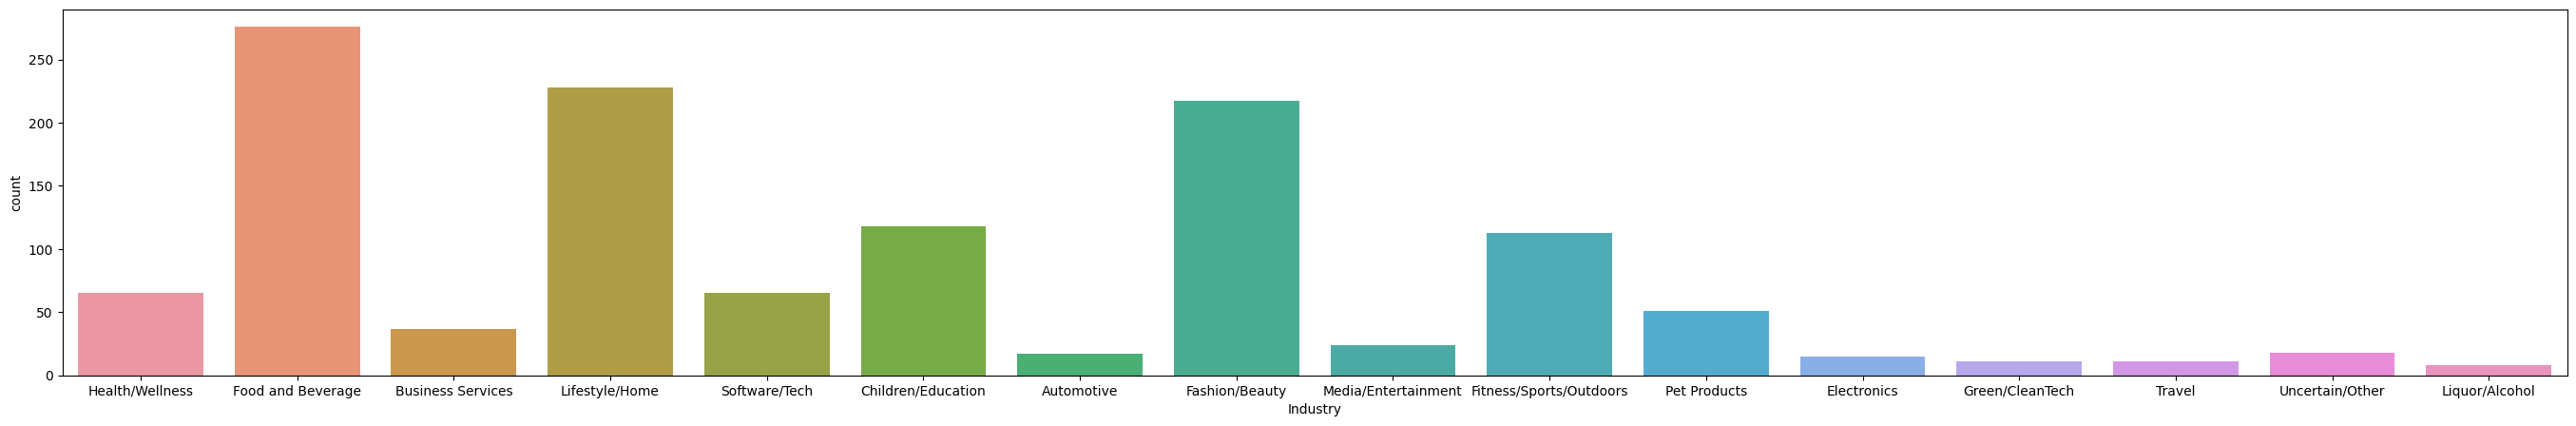

In [29]:
# Types of industries, came for investments, in all seasons
fig, ax = plt.subplots(figsize=(34, 5))
sns.countplot(data=shark_tank, x="Industry",ax=ax)


From here we can say that most of the startup are from **Food and Beverage** , **Lifestyle/Home** and **Fashion/Beauty**.

In [30]:
# Gender wise
print(shark_tank['Pitchers Gender'].value_counts(),"\n")



Male          703
Female        330
Mixed Team    234
Name: Pitchers Gender, dtype: int64 



<Axes: title={'center': 'Pitchers Gender wise percentage'}, ylabel='Pitchers Gender'>

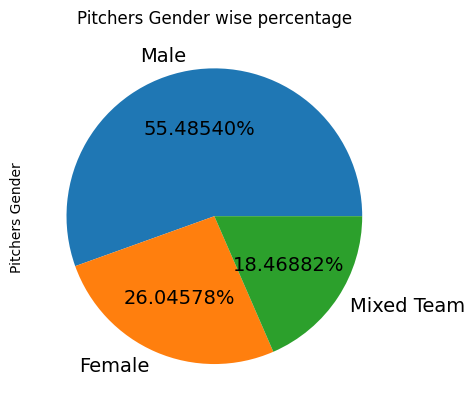

In [38]:
# In percentage
plt.title("Pitchers Gender wise percentage")
shark_tank["Pitchers Gender"].value_counts().plot(kind='pie', autopct='%.5f%%', fontsize=14)

More than **50%** of Pitchers are **Male**

In [39]:
# Age wise
print(shark_tank['Pitchers Average Age'].value_counts(),"\n")



Middle    308
Young      24
Old         6
Name: Pitchers Average Age, dtype: int64 



<Axes: ylabel='Pitchers Average Age'>

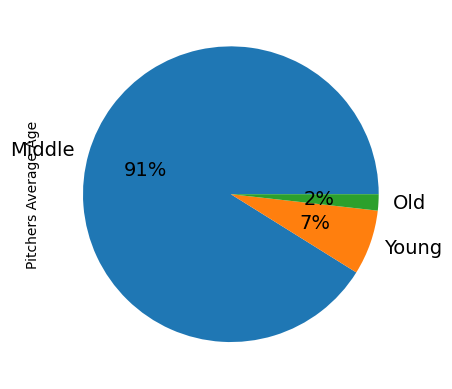

In [43]:
# In percentage
shark_tank["Pitchers Average Age"].value_counts().plot(kind='pie', autopct='%.0f%%', fontsize=14)

90% of the pitchers are middle aged.

1    765
0    509
Name: Got Deal, dtype: int64 

1    60%
0    40%
Name: Got Deal, dtype: object


Text(0, 0.5, 'Count')

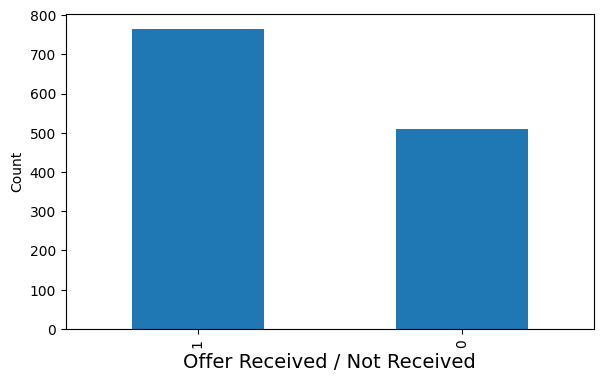

In [47]:
# Offers received
print(shark_tank['Got Deal'].value_counts(), "\n")
print(round(shark_tank['Got Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Got Deal"].value_counts().plot(kind='bar')
plt.xlabel("Offer Received / Not Received", size=14)
plt.ylabel("Count")


# 757 companies received offers & 506 startups could not convince #Sharks to invest.

Male          397
Female        210
Mixed Team    153
Name: Pitchers Gender, dtype: int64


<Axes: ylabel='Pitchers Gender'>

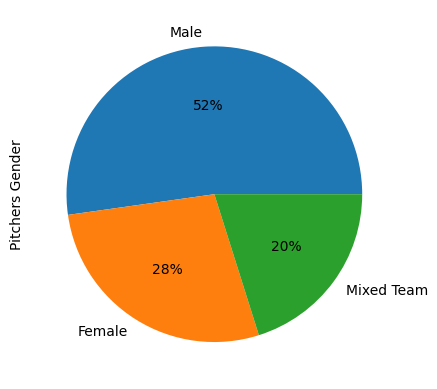

In [48]:
# Gender wise distribution, who received the offer
print(shark_tank[shark_tank['Got Deal']==1]['Pitchers Gender'].value_counts())
shark_tank[shark_tank['Got Deal']==1]['Pitchers Gender'].value_counts().sort_values(ascending=False).plot.pie(autopct='%.0f%%')

Male          306
Female        120
Mixed Team     81
Name: Pitchers Gender, dtype: int64


<Axes: ylabel='Pitchers Gender'>

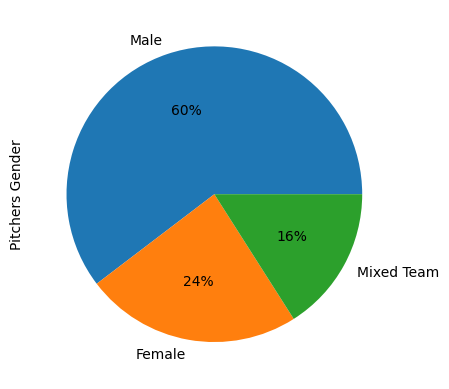

In [49]:
# Gender wise distribution, who could NOT receive the offer
print(shark_tank[shark_tank['Got Deal']==0]['Pitchers Gender'].value_counts())
shark_tank[shark_tank['Got Deal']==0]['Pitchers Gender'].value_counts().sort_values(ascending=False).plot.pie(autopct='%.0f%%')

In [ ]:
# Maximum amount requested
print("Maximum amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].max(), 'USD', locale='en_US').replace(".00", ""))

Maximum amount requested, by a pitcher - $5,000,000


In [ ]:
# Least amount requested
print("Least amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].min(), 'USD', locale='en_US').replace(".00", ""))

Least amount requested, by a pitcher - $10,000


In [ ]:
# Sum of investment amount asked, in Shark Tank America
print("Sum of investment amount asked, by all startup companies, in US Shark Tank -", format_currency(shark_tank['Original Ask Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))

Sum of investment amount asked, by all startup companies, in US Shark Tank - $361,991,000


In [ ]:
# Amount invested by all sharks, in US SharkTank
print("Amount invested by all sharks, in Shark Tank US -", format_currency(shark_tank['Total Deal Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))

Amount invested by all sharks, in Shark Tank US - $226,488,166


In [57]:
# Sum of loan/debt amount, in American Shark Tank
print("Sum of loan/debt amount, given by all sharks, in American SharkTank -", format_currency(shark_tank['Loan'].sum(), 'USD', locale='en_US').replace(".00", ""))

Sum of loan/debt amount, given by all sharks, in American SharkTank - $22,437,500


In [56]:
# Top 15 investments, as per total investment/deal amount
print(shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(15))



Startup Name
AirCar                     5000000.0
MokiDoorstep               3000000.0
SynDaverLabs               3000000.0
Zipz                       2500000.0
DBestProducts              2350000.0
Fizzics                    2000000.0
TenThirtyOneProductions    2000000.0
Vengo                      2000000.0
RuggedManiac               1750000.0
BeyondSushi                1500000.0
Sworkit                    1500000.0
XCraft                     1500000.0
Trunkster                  1400000.0
HyConn                     1250000.0
Jackson'sHonest            1250000.0
Name: Total Deal Amount, dtype: float64


In [59]:
# Top 20 investments, as per total equity/shares percentage diluted
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(20))



Startup Name
ClassroomJams           100.0
CoolWraps               100.0
Evrewares               100.0
Hugo'sAmazingTape       100.0
HyConn                  100.0
MokiDoorstep            100.0
RokBlok                 100.0
TurboBaster             100.0
WineBalloon             100.0
LegacyShave              95.0
GrooveBook               80.0
RemyxxReKixxSneakers     80.0
Henry'sHumdingers        75.0
JeskaShoeCompany         70.0
Lightfilm                70.0
TheUROClub               70.0
ReaderestSpecsecure      65.0
TheLastLid               60.0
TreasureChestPets        60.0
CordaRoy's               58.0
Name: Total Deal Equity, dtype: float64


In [60]:
# Startups who got Debt/loan amount
print("Number of startups who got debt/loan amount", shark_tank['Loan'].count(),"\n")

shark_tank.loc[shark_tank['Loan'] >= 1][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount","Total Deal Equity","Loan"]]

Number of startups who got debt/loan amount 52 



,Season Number,Startup Name,Original Ask Amount,Total Deal Amount,Total Deal Equity,Loan
272,5,RapidRamenCooker,300000,150000.0,15.00,150000.0
289,5,BetterLife,400000,400000.0,17.00,400000.0
291,5,PaparazziProposals,250000,250000.0,33.00,200000.0
299,5,Grace&Lace,175000,87500.0,10.00,87500.0
300,5,Yubo,150000,150000.0,20.00,150000.0
433,6,Scratch&GrainBakingCo,150000,150000.0,20.00,150000.0
459,6,CocoJack,125000,125000.0,25.00,125000.0
571,7,BetterBack,750000,750000.0,8.00,750000.0
580,7,Vengo,2000000,2000000.0,10.00,2000000.0
586,7,Coolbox,500000,500000.0,15.00,500000.0


In [61]:
# Startups who gave Royalty/Advisory shares
print("Number of startups who gave Royalty", shark_tank['Royalty Deal'].count(),"\n")

shark_tank.loc[shark_tank['Royalty Deal'] == 1][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount","Total Deal Equity"]]

Number of startups who gave Royalty 75 



,Season Number,Startup Name,Original Ask Amount,Total Deal Amount,Total Deal Equity
6,1,ClassroomJams,250000,250000.0,100.0
10,1,TurboBaster,35000,35000.0,100.0
26,1,ElementBars,150000,150000.0,30.0
69,2,FirstDefenseNasalScreen,500000,750000.0,30.0
72,2,ModMomFurniture,90000,90000.0,33.0
...,...,...,...,...,...
1243,14,BigMouthToothbrush,150000,150000.0,20.0
1258,14,PartingStone,400000,400000.0,10.0
1263,14,Play Maysie,150000,150000.0,20.0
1266,14,NaturesWildBerry,80000,80000.0,20.0


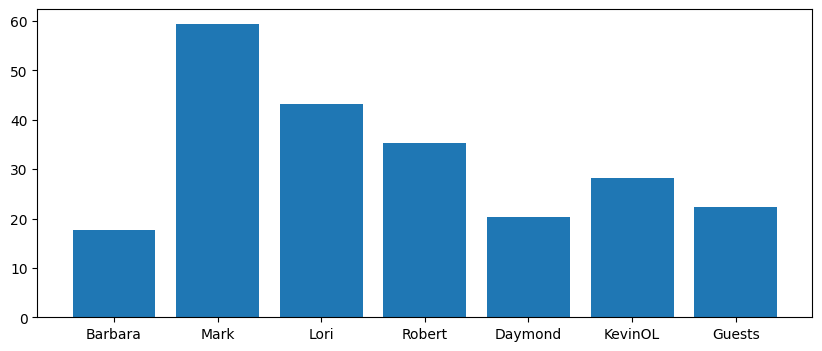

In [64]:
# Amount Invested by sharks
Amount = [(shark_tank['Barbara Corcoran Investment Amount']/1000000).sum(), (shark_tank['Mark Cuban Investment Amount']/1000000).sum(), (shark_tank['Lori Greiner Investment Amount']/1000000).sum(), (shark_tank['Robert Herjavec Investment Amount']/1000000).sum(),
    (shark_tank['Daymond John Investment Amount']/1000000).sum(), (shark_tank['Kevin O Leary Investment Amount']/1000000).sum(), (shark_tank['Guest Investment Amount']/1000000).sum()]


name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])

plt.show()

<BarContainer object of 7 artists>

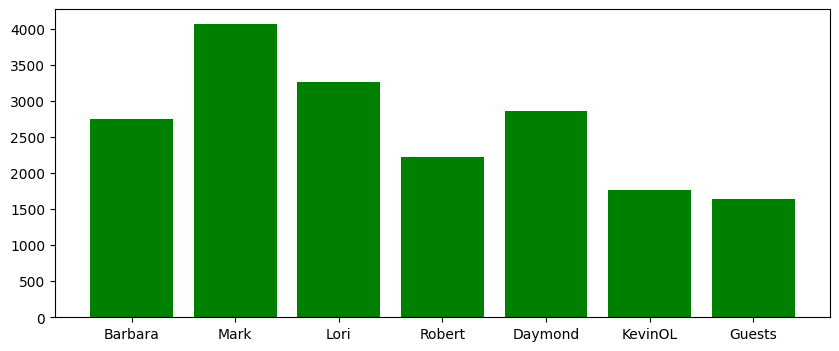

In [66]:
# Equity received by sharks
Equity = [shark_tank['Barbara Corcoran Investment Equity'].sum(), shark_tank['Mark Cuban Investment Equity'].sum(), shark_tank['Lori Greiner Investment Equity'].sum(), shark_tank['Robert Herjavec Investment Equity'].sum(),
    shark_tank['Daymond John Investment Equity'].sum(), shark_tank['Kevin O Leary Investment Equity'].sum(), shark_tank['Guest Investment Equity'].sum()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Equity':Equity}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'], color='g')


**Mark** received hight equity

<BarContainer object of 7 artists>

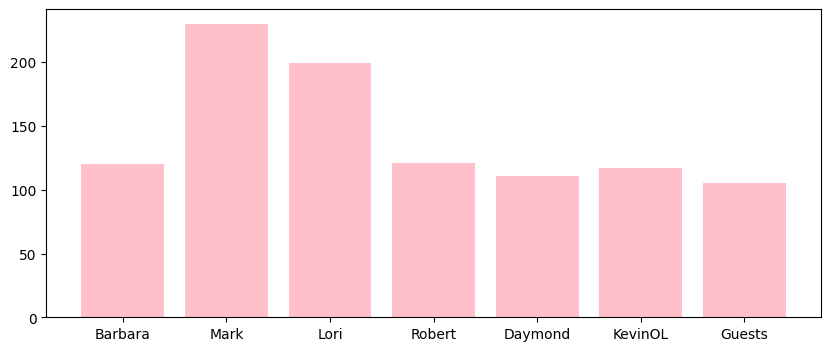

In [68]:
# Number of companies invested
Amount = [(shark_tank['Barbara Corcoran Investment Amount']).count(), (shark_tank['Mark Cuban Investment Amount']).count(), (shark_tank['Lori Greiner Investment Amount']).count(), (shark_tank['Robert Herjavec Investment Amount']).count(),
    (shark_tank['Daymond John Investment Amount']).count(), (shark_tank['Kevin O Leary Investment Amount']).count(), (shark_tank['Guest Investment Amount']).count()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'], color='pink')


**Mark and Lori** invested in more than 200 companies.

In [69]:
# Top 5, guests sharks who invested in most number of companies
shark_tank.groupby('Guest Name').size().nlargest(5)

Guest Name
Daniel Lubetzky    15
Alex Rodriguez      8
Chris Sacca         8
Rohan Oza           8
Emma Grede          7
dtype: int64

In [70]:
# Investment amount by guests, in Millions
round(shark_tank.groupby(["Guest Name"])["Guest Investment Amount"].sum().sort_values(ascending=False)/1000000,2)

Guest Name
Daniel Lubetzky      4.47
Rohan Oza            3.58
Chris Sacca          1.57
Matt Higgins         1.52
Alex Rodriguez       1.24
Kendra Scott         1.10
Emma Grede           1.08
Tony Xu              0.88
Peter Jones          0.80
Sara Blakely         0.70
Kevin Hart           0.65
Kevin Harrington     0.51
Jamie Siminoff       0.50
Maria Sharapova      0.45
Charles Barkley      0.38
Richard Branson      0.36
Gwyneth Paltrow      0.32
Daniel Lubetzsky     0.25
Anne Wojcicki        0.25
Nirav Tolia          0.22
Katrina Lake         0.20
Blake Mycoskie       0.20
Ashton Kutcher       0.20
Troy Carter          0.20
John Paul DeJoria    0.15
Nick Woodman         0.12
Bethenny Frankel     0.12
Alli Webb            0.09
Nirv Tolia           0.08
Jeff Foxworthy       0.05
Steve Tisch          0.05
Name: Guest Investment Amount, dtype: float64

In [75]:
print("Total investments by Barbara Corcoran", shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0][['Barbara Corcoran Investment Amount']].count().to_string()[-3:])
print("Investment amount by Barbara Corcoran", format_currency(shark_tank['Barbara Corcoran Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Barbara Corcoran", round(shark_tank['Barbara Corcoran Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Barbara Corcoran Investment Amount']>0][["Startup Name","Industry","Barbara Corcoran Investment Amount"]].to_string(index=False))
print('-'*75)





Total investments by Barbara Corcoran 120
Investment amount by Barbara Corcoran $17,715,000
Equity received by Barbara Corcoran 2745.9 % in different companies

Company details:
---------------------------------------------------------------------------
               Startup Name                Industry  Barbara Corcoran Investment Amount
             AvaTheElephant         Health/Wellness                             50000.0
         Mr.Tod'sPieFactory       Food and Beverage                            230000.0
              ClassroomJams      Children/Education                             50000.0
             StressFreeKids      Children/Education                            250000.0
                  Coverplay      Children/Education                             35000.0
                    BodyJac Fitness/Sports/Outdoors                            180000.0
         PorkBarrelBBQSauce       Food and Beverage                             50000.0
          TreasureChestPets            Pet

In [78]:
print("Total investments by Mark Cuban", shark_tank[shark_tank['Mark Cuban Investment Amount']>0][['Mark Cuban Investment Amount']].count().to_string()[-3:])
print("Investment amount by Mark Cuban", format_currency(shark_tank['Mark Cuban Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Mark Cuban", round(shark_tank['Mark Cuban Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Mark Cuban Investment Amount']>0][["Startup Name","Industry","Mark Cuban Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nMark Cuban industry wise investments\n")
print(shark_tank[shark_tank['Mark Cuban Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))


Total investments by Mark Cuban 230
Investment amount by Mark Cuban $59,424,333.33
Equity received by Mark Cuban 4070.85 % in different companies

Company details:
---------------------------------------------------------------------------
             Startup Name                Industry  Mark Cuban Investment Amount
            ClassroomJams      Children/Education                  5.000000e+04
                TippiToes Fitness/Sports/Outdoors                  5.000000e+04
                 Toygaroo      Children/Education                  1.000000e+05
  FirstDefenseNasalScreen         Health/Wellness                  2.500000e+05
                   HyConn         Uncertain/Other                  1.250000e+06
                    EZVIP     Media/Entertainment                  7.500000e+04
           TheCleanBottle       Food and Beverage                  6.000000e+04
    IWantToDrawACatForYou           Software/Tech                  2.500000e+04
              WineBalloon       Food and

In [80]:
print("Total investments by Lori Greiner", shark_tank[shark_tank['Lori Greiner Investment Amount']>0][['Lori Greiner Investment Amount']].count().to_string()[-3:])
print("Investment amount by Lori Greiner", format_currency(shark_tank['Lori Greiner Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Lori Greiner", round(shark_tank['Lori Greiner Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Lori Greiner Investment Amount']>0][["Startup Name","Industry","Lori Greiner Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nLori Greiner industry wise investments\n")
print(shark_tank[shark_tank['Lori Greiner Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))



Total investments by Lori Greiner 199
Investment amount by Lori Greiner $43,243,333.33
Equity received by Lori Greiner 3258.35 % in different companies

Company details:
---------------------------------------------------------------------------
          Startup Name                Industry  Lori Greiner Investment Amount
                ShowNo          Fashion/Beauty                    7.500000e+04
         M3GirlDesigns          Fashion/Beauty                    1.000000e+05
   ReaderestSpecsecure          Lifestyle/Home                    1.500000e+05
               NailPak          Fashion/Beauty                    5.000000e+04
               BagBowl          Lifestyle/Home                    4.000000e+04
             Back9Dips       Food and Beverage                    7.500000e+04
            MarzSprays         Health/Wellness                    2.000000e+05
            ScrubDaddy          Lifestyle/Home                    2.000000e+05
          TheCoolWazoo      Children/Educat

In [81]:
print("Total investments by Robert Herjavec", shark_tank[shark_tank['Robert Herjavec Investment Amount']>0][['Robert Herjavec Investment Amount']].count().to_string()[-3:])
print("Investment amount by Robert Herjavec", format_currency(shark_tank['Robert Herjavec Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Robert Herjavec", round(shark_tank['Robert Herjavec Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Robert Herjavec Investment Amount']>0][["Startup Name","Industry","Robert Herjavec Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nRobert Herjavec industry wise investments\n")
print(shark_tank[shark_tank['Robert Herjavec Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))


Total investments by Robert Herjavec 121
Investment amount by Robert Herjavec $35,397,332.67
Equity received by Robert Herjavec 2223.08 % in different companies

Company details:
---------------------------------------------------------------------------
           Startup Name                Industry  Robert Herjavec Investment Amount
           APerfectPear       Food and Beverage                       2.500000e+05
          ClassroomJams      Children/Education                       5.000000e+04
         GiftCardRescue           Software/Tech                       1.000000e+05
       MyTherapyJournal         Health/Wellness                       4.000000e+04
          Soy-Yer-Dough       Food and Beverage                       1.000000e+05
         GrillCharmsSet          Fashion/Beauty                       5.000000e+04
            JumpForward      Children/Education                       3.000000e+05
      GreaseMonkeyWipes          Lifestyle/Home                       2.000000e+0

In [82]:
print("Total investments by Daymond John", shark_tank[shark_tank['Daymond John Investment Amount']>0][['Daymond John Investment Amount']].count().to_string()[-3:])
print("Investment amount by Daymond John", format_currency(shark_tank['Daymond John Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Daymond John", round(shark_tank['Daymond John Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Daymond John Investment Amount']>0][["Startup Name","Industry","Daymond John Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nDaymond John industry wise investments\n")
print(shark_tank[shark_tank['Daymond John Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))


Total investments by Daymond John 111
Investment amount by Daymond John $20,249,833.33
Equity received by Daymond John 2868.73 % in different companies

Company details:
---------------------------------------------------------------------------
               Startup Name                Industry  Daymond John Investment Amount
         Mr.Tod'sPieFactory       Food and Beverage                      230000.000
              ClassroomJams      Children/Education                       50000.000
              Soy-Yer-Dough       Food and Beverage                      100000.000
          TreasureChestPets            Pet Products                       50000.000
        GaylaBentleyFashion          Fashion/Beauty                      125000.000
          HellsBellsHelmets Fitness/Sports/Outdoors                      500000.000
              LipstickRemix          Fashion/Beauty                       52500.000
                   Nubrella          Fashion/Beauty                      200000.00

In [83]:
print("Total investments by Kevin O Leary", shark_tank[shark_tank['Kevin O Leary Investment Amount']>0][['Kevin O Leary Investment Amount']].count().to_string()[-3:])
print("Investment amount by Kevin O Leary", format_currency(shark_tank['Kevin O Leary Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Kevin O Leary", round(shark_tank['Kevin O Leary Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Kevin O Leary Investment Amount']>0][["Startup Name","Industry","Kevin O Leary Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nKevin O Leary industry wise investments\n")
print(shark_tank[shark_tank['Kevin O Leary Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))


Total investments by Kevin O Leary 117
Investment amount by Kevin O Leary $28,167,500
Equity received by Kevin O Leary 1768.07 % in different companies

Company details:
---------------------------------------------------------------------------
          Startup Name                Industry  Kevin O Leary Investment Amount
          APerfectPear       Food and Beverage                     2.500000e+05
         ClassroomJams      Children/Education                     5.000000e+04
        GiftCardRescue           Software/Tech                     1.000000e+05
      MyTherapyJournal         Health/Wellness                     4.000000e+04
         Soy-Yer-Dough       Food and Beverage                     1.000000e+05
           JumpForward      Children/Education                     3.000000e+05
              Toygaroo      Children/Education                     1.000000e+05
          FridgeFronts          Lifestyle/Home                     5.000000e+04
           TalbottTeas       Food 

In [84]:
print("Total investments by all Guests", shark_tank[shark_tank['Guest Investment Amount']>0][['Guest Investment Amount']].count().to_string()[-2:])
print("Investment amount by all Guests", format_currency(shark_tank['Guest Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by all Guests", round(shark_tank['Guest Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*92)
print(shark_tank.loc[shark_tank['Guest Investment Amount']>0][["Startup Name","Industry","Guest Investment Amount","Guest Name"]].to_string(index=False))
print('-'*92)

print("\nAll Guests industry wise investments\n")
print(shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))


Total investments by all Guests 05
Investment amount by all Guests $22,290,833.33
Equity received by all Guests 1637.2 % in different companies

Company details:
--------------------------------------------------------------------------------------------
             Startup Name                Industry  Guest Investment Amount        Guest Name
              TurboBaster       Food and Beverage             3.500000e+04  Kevin Harrington
              ElementBars Fitness/Sports/Outdoors             1.500000e+05  Kevin Harrington
               TheUROClub Fitness/Sports/Outdoors             2.500000e+04  Kevin Harrington
           Caffeindicator       Food and Beverage             2.000000e+05  Kevin Harrington
                 Hydromax Fitness/Sports/Outdoors             5.000000e+04    Jeff Foxworthy
                CitiKitty            Pet Products             1.000000e+05  Kevin Harrington
               Tree-T-Pee         Green/CleanTech             1.500000e+05 John Paul DeJoria
 

In [85]:
# Number of sharks in a deal
print(shark_tank['Number of sharks in deal'].value_counts(), "\n")




1.0    568
2.0    171
3.0     17
5.0      6
4.0      3
Name: Number of sharks in deal, dtype: int64 



1.0    74%
2.0    22%
3.0     2%
5.0     1%
4.0     0%
Name: Number of sharks in deal, dtype: object


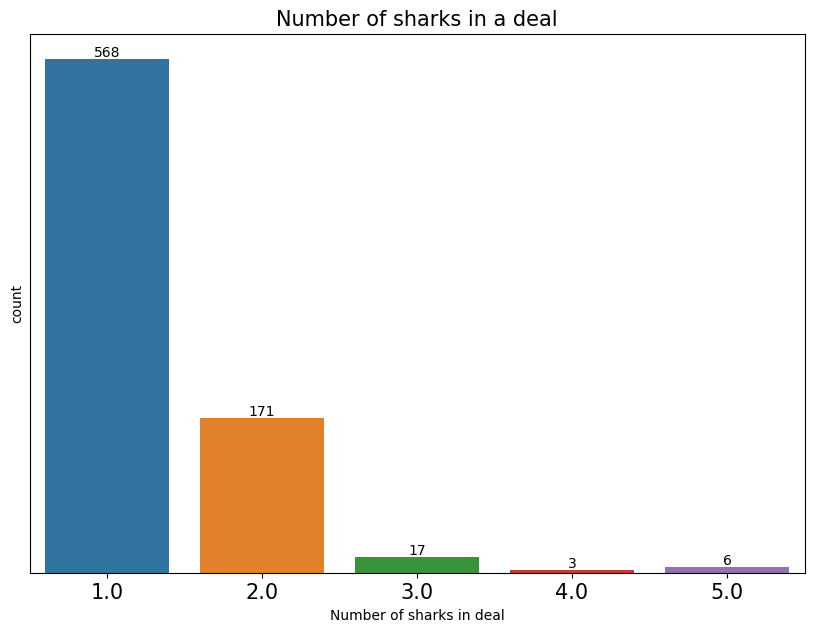

In [91]:
# In percentage
print(round(shark_tank['Number of sharks in deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(10, 7))
plt.title("Number of sharks in a deal", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
ax=sns.countplot(data = shark_tank, x = 'Number of sharks in deal')
for bar in ax.containers:
  ax.bar_label(bar)


In [92]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of sharks in deal'] >= 5][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]])

      Season Number   Startup Name  Total Deal Amount  Total Deal Equity
6                 1  ClassroomJams           250000.0              100.0
161               4      BuggyBeds           250000.0               25.0
268               5   Breathometer          1000000.0               30.0
514               7         XCraft          1500000.0               25.0
814              10    CupBoardPro           100000.0               20.0
1272             14        Eyewris           125000.0               20.0


In [93]:
# Sharks with most number of solo deals
amt_cols = shark_tank.columns[shark_tank.columns.str.contains(' Investment Amount')].tolist()
tmp = shark_tank.loc[shark_tank['Number of sharks in deal'] == 1][amt_cols]
tmp.count().sort_values(ascending=False).nlargest(3)

# Mark did more solo deals, than any other Shark

Mark Cuban Investment Amount          119
Lori Greiner Investment Amount        105
Barbara Corcoran Investment Amount     79
dtype: int64

<Axes: xlabel='Pitchers State', ylabel='count'>

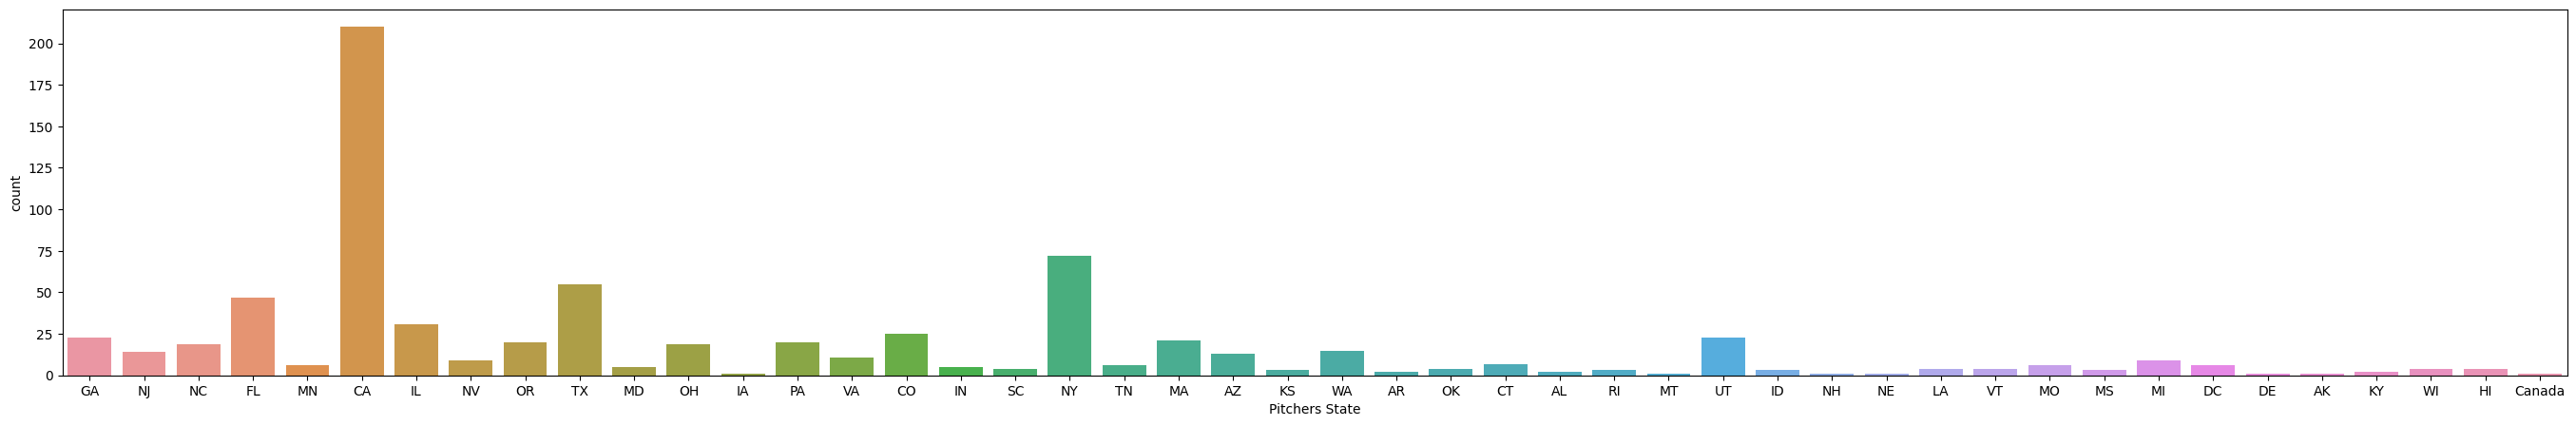

In [101]:
# Top 25 US 🇺🇸 states of pitcher's
fig, ax = plt.subplots(figsize=(34, 5))
sns.countplot(data=shark_tank, x="Pitchers State",ax=ax)


From here we can say that most of the Pitchers are from 'CA','NY','TX' and 'Fl'

In [103]:
# Most frequently asked amount, by startups
shark_tank.groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (USD) and Number times asked

Original Ask Amount
100000    157
200000    134
150000    133
500000    132
250000    111
300000     99
50000      84
75000      50
400000     50
125000     29
dtype: int64

In [104]:
# Most frequently offered equity, by startups
shark_tank.groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number times offered

Original Offered Equity
10.0    403
20.0    221
5.0     178
15.0    158
25.0     72
30.0     33
8.0      29
7.0      18
12.0     15
6.0      14
dtype: int64

In [105]:
# Most frequently invested amount, by Sharks
shark_tank.groupby('Total Deal Amount').size().nlargest(10)

# Total Deal Amount (USD) and Number times invested

Total Deal Amount
100000.0    99
200000.0    85
150000.0    80
300000.0    70
500000.0    70
250000.0    67
50000.0     42
75000.0     29
400000.0    26
600000.0    19
dtype: int64

In [106]:
# Most frequently received total equity, by Sharks
shark_tank.groupby('Total Deal Equity').size().nlargest(10)

# Total Deal Equity (in %) and Number times invested

Total Deal Equity
20.0    128
25.0    119
10.0     73
15.0     68
30.0     67
40.0     35
50.0     34
5.0      26
33.0     23
35.0     22
dtype: int64

In [107]:
# Mostly successful combinations (of asked amount and offered equity)
shark_tank.loc[shark_tank['Got Deal'] == 1].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(10)

# If you are pitching in US Shark Tank, ask for 150K/200K with 10% equity

Original Ask Amount  Original Offered Equity
150000               10.0                       37
200000               10.0                       36
100000               10.0                       33
300000               10.0                       33
100000               20.0                       25
250000               10.0                       24
150000               15.0                       20
500000               10.0                       20
                     5.0                        19
250000               5.0                        16
dtype: int64

In [108]:
# Most frequently asked amount, by startups who could NOT get a deal
shark_tank.loc[shark_tank['Got Deal'] == 0].groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (USD) and Number times asked (but rejected by sharks)

Original Ask Amount
500000    61
100000    57
200000    51
150000    46
250000    38
300000    35
50000     31
75000     22
400000    21
125000    15
dtype: int64

In [109]:
# Most frequently offered equity, by startups who could NOT get a deal
shark_tank.loc[shark_tank['Got Deal'] == 0].groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number times offered (but rejected by sharks)

Original Offered Equity
10.0    147
20.0    109
5.0      66
15.0     58
25.0     34
30.0     17
8.0      12
40.0      8
3.0       6
12.0      5
dtype: int64

In [110]:
# Mostly rejected combinations (of asked amount and offered equity)
shark_tank.loc[shark_tank['Got Deal'] == 0].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(10)

# If you are pitching in Shark Tank US, don't ask for 100K with 10%/20% equity or 500K with 5% equity

Original Ask Amount  Original Offered Equity
100000               10.0                       22
500000               5.0                        20
100000               20.0                       19
200000               10.0                       16
300000               10.0                       16
150000               10.0                       15
200000               20.0                       14
500000               10.0                       14
250000               10.0                       13
150000               20.0                       12
dtype: int64

In [112]:
# Many (100+) companies got more amount than they asked/expected
shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount"]]

,Season Number,Startup Name,Original Ask Amount,Total Deal Amount
15,1,GiftCardRescue,150000,200000.0
30,1,Soy-Yer-Dough,125000,300000.0
43,1,JumpForward,150000,600000.0
64,2,WurkinStiffs,85000,100000.0
65,2,TippiToes,30000,100000.0
...,...,...,...,...
1208,14,Collars&Co,300000,1000000.0
1209,14,Wondry,185000,225000.0
1212,14,LegacyShave,300000,700000.0
1256,14,Bleni,250000,750000.0


In [113]:
# Most of the companies diluted/gave their company equity more than they initially offered/expected
shark_tank.loc[shark_tank['Original Offered Equity'] < shark_tank["Total Deal Equity"]][["Season Number","Startup Name","Original Offered Equity","Total Deal Equity"]]

,Season Number,Startup Name,Original Offered Equity,Total Deal Equity
0,1,AvaTheElephant,15.0,55.0
1,1,Mr.Tod'sPieFactory,10.0,50.0
5,1,APerfectPear,15.0,50.0
6,1,ClassroomJams,10.0,100.0
10,1,TurboBaster,35.0,100.0
...,...,...,...,...
1266,14,NaturesWildBerry,15.0,20.0
1267,14,YouGoNatural,5.0,10.0
1269,14,NoshiFood,17.0,25.0
1270,14,Tucky,30.0,39.0


In [114]:
# Below companies got the same valuation they requested (with or without loan)
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

,Season Number,Startup Name,Valuation Requested,Deal Valuation
51,1,GreaseMonkeyWipes,100000,100000.0
60,1,Qubits,176471,176471.0
78,2,Ride-OnCarry-On,200000,200000.0
85,2,DaisyCakes,200000,200000.0
92,2,HyConn,1250000,1250000.0
...,...,...,...,...
1173,13,HandyPan,500000,500000.0
1198,14,Woosh,5000000,5000000.0
1216,14,ShredSkinz,300000,300000.0
1218,14,ChessUp,6000000,6000000.0


In [115]:
# There are companies which got more valuation than they pitched
shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

,Season Number,Startup Name,Valuation Requested,Deal Valuation
30,1,Soy-Yer-Dough,500000,588235.0
31,1,GrillCharmsSet,200000,250000.0
77,2,HillbillyBrand,200000,300000.0
84,2,SweepEasy,160000,227273.0
104,3,IWantToDrawACatForYou,40000,75758.0
112,3,WineBalloon,133333,400000.0
113,3,ShowNo,200000,300000.0
149,3,BootIllusions,333333,1250000.0
232,4,Lose12Inches,480000,500000.0
268,5,Breathometer,2500000,3333333.0


In [116]:
# Episodes which got most TRP
print("Maximum viewership in US:", shark_tank['US Viewership'].max(), "\n")
print(shark_tank.loc[shark_tank['US Viewership']>=shark_tank['US Viewership'].max()-0.4][["Season Number","Episode Number","Startup Name","US Viewership"]].head(18).sort_values("US Viewership",ascending=False).to_string(index=False))

Maximum viewership in US: 8.64 

 Season Number  Episode Number    Startup Name  US Viewership
             6              15        TurboPUP           8.64
             6              15           Lumio           8.64
             6              15      BelloVerde           8.64
             6              15         Napwell           8.64
             6              20        LuminAid           8.43
             6              20         Scholly           8.43
             6              20        KeenHome           8.43
             6              20    TaalumaTotes           8.43
             5              27       Angellift           8.33
             5              27        HangEase           8.33
             5              27 TheBouqsCompany           8.33
             5              27      SustyParty           8.33
             5              21   PackbackBooks           8.29
             5              21          Chapul           8.29
             5              21  Garag

In [117]:
# Episodes which got least TRP
print("Minimum viewership in United States:", shark_tank['US Viewership'].min(), "\n")
print(shark_tank.loc[shark_tank['US Viewership']<=shark_tank['US Viewership'].min()+0.3][["Season Number","Episode Number","Startup Name","US Viewership"]].head(18).sort_values("US Viewership").to_string(index=False))

Minimum viewership in United States: 2.27 

 Season Number  Episode Number    Startup Name  US Viewership
            11              23          Salted           2.27
            11              23       MCSquares           2.27
            11              23           Slate           2.27
            11              23     RescueReady           2.27
            12               4      JadaSpices           2.31
            12               4    SurpriseCake           2.31
            12               4 TheMightyCarver           2.31
            12               4        Flipstik           2.31
            11              21          Proven           2.39
            11              21         Tanoshi           2.39
            11              21      UnbuckleMe           2.39
            11              21     VanRobotics           2.39


0    471
1    376
Name: Multiple Entrepreneurs, dtype: Int64 

0    56%
1    44%
Name: Multiple Entrepreneurs, dtype: object


<Axes: ylabel='Multiple Entrepreneurs'>

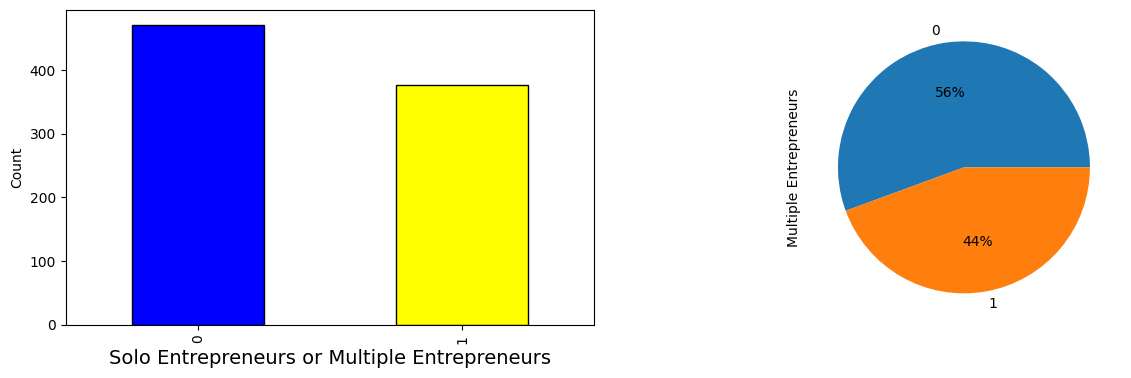

In [121]:
# Solo or multiple Entrepreneurs ?
print(shark_tank['Multiple Entrepreneurs'].value_counts(), "\n")
print(round(shark_tank['Multiple Entrepreneurs'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Multiple Entrepreneurs"].value_counts().plot(kind='bar', color=["blue","yellow"], ec="k")
plt.xlabel("Solo Entrepreneurs or Multiple Entrepreneurs", size=14)
plt.ylabel("Count")


ax2 = plt.subplot(222)
shark_tank["Multiple Entrepreneurs"].value_counts().plot(kind='pie', autopct='%.0f%%')

In [122]:
# Correlation matrix
shark_tank.corr().style.background_gradient(cmap = 'Blues')

,Season Number,Episode Number,Pitch Number,Multiple Entrepreneurs,US Viewership,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of sharks in deal,Investment Amount Per Shark,Equity Per Shark,Royalty Deal,Loan,Barbara Corcoran Investment Amount,Barbara Corcoran Investment Equity,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Total Deal Amount in M
Season Number,1.000000,0.078265,0.994854,0.184813,-0.633342,0.055676,-0.385181,0.206953,0.167132,0.077790,-0.375231,0.173123,-0.061349,0.090025,-0.302898,nan,-0.037127,0.373705,-0.373568,0.052949,-0.290590,0.070562,-0.162898,0.081861,-0.083914,0.113239,-0.166357,0.064259,-0.223569,0.145297,-0.444023,-0.282512,0.598088,0.703785,-0.377024,-0.388027,-0.257443,0.077790
Episode Number,0.078265,1.000000,0.139279,0.056507,0.111350,0.077409,-0.050652,0.042499,0.003321,0.052532,-0.070578,0.020931,-0.102263,0.091387,-0.019133,nan,0.123877,0.110372,-0.122486,0.012096,0.039896,-0.021169,0.009835,0.273894,0.066900,0.024389,0.098755,0.042028,-0.036966,0.030602,-0.132968,-0.078029,0.245522,0.199034,0.017833,-0.088207,-0.031845,0.052532
Pitch Number,0.994854,0.139279,1.000000,0.184209,-0.662470,0.060142,-0.382318,0.209906,0.165280,0.080219,-0.366878,0.173356,-0.067558,0.094742,-0.295187,nan,-0.015237,0.379902,-0.360150,0.056367,-0.287617,0.074796,-0.162953,0.097014,-0.066826,0.119036,-0.152310,0.063526,-0.219328,0.148658,-0.424040,-0.258604,0.512184,0.671267,-0.377812,-0.382131,-0.269486,0.080219
Multiple Entrepreneurs,0.184813,0.056507,0.184209,1.000000,-0.113750,0.031562,-0.125570,0.025704,0.113922,0.059483,-0.146046,0.055326,0.007136,0.070439,-0.136259,nan,0.080835,0.036700,-0.178639,0.069117,-0.080347,-0.029201,-0.105020,0.052180,-0.107532,0.083010,-0.143591,0.050860,-0.015201,0.087014,-0.174786,-0.015126,0.089344,0.082112,-0.008421,-0.073564,-0.030465,0.059483
US Viewership,-0.633342,0.111350,-0.662470,-0.113750,1.000000,-0.021585,0.190469,-0.135893,-0.109101,-0.019707,0.134413,-0.112666,0.045687,-0.031822,0.117914,nan,-0.069819,-0.289742,-0.002088,-0.027533,0.154724,-0.094781,0.100499,0.074577,-0.051183,-0.138635,-0.017143,0.030678,0.087426,-0.176443,0.001664,-0.054601,0.227794,0.025544,0.295661,0.052532,0.248038,-0.019707
Original Ask Amount,0.055676,0.077409,0.060142,0.031562,-0.021585,1.000000,-0.129720,0.633547,-0.074080,0.876480,-0.180514,0.621673,-0.011164,0.876081,-0.161235,nan,0.806861,0.692330,-0.296704,0.809768,-0.214303,0.793962,-0.286213,0.973024,0.148521,0.358551,-0.198729,0.928192,-0.212458,0.810652,-0.173405,-0.010013,0.060349,0.019325,-0.075309,0.000006,-0.026975,0.876480
Original Offered Equity,-0.385181,-0.050652,-0.382318,-0.125570,0.190469,-0.129720,1.000000,-0.405682,-0.104562,-0.155427,0.612974,-0.366252,-0.002592,-0.142124,0.561222,nan,-0.400229,-0.152097,0.368328,-0.248417,0.610314,-0.333842,0.567753,0.249357,0.420025,-0.213427,0.356884,-0.206467,0.466279,-0.290093,0.654542,0.111261,-0.226428,-0.260888,0.166022,0.145928,0.105179,-0.155427
Valuation Requested,0.206953,0.042499,0.209906,0.025704,-0.135893,0.633547,-0.405682,1.000000,-0.034153,0.607053,-0.389592,0.893867,-0.026413,0.582742,-0.348975,nan,0.688939,0.524313,-0.434345,0.695351,-0.324214,0.655115,-0.349716,0.629926,-0.128525,0.349754,-0.294281,0.614971,-0.360904,0.683862,-0.296244,-0.042621,0.112052,0.129195,-0.125476,-0.093107,-0.097631,0.607053
Got Deal,0.167132,0.003321,0.165280,0.113922,-0.109101,-0.074080,-0.104562,-0.034153,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na

In [123]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Total Deal Amount'].isnull())]

,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Business Description,Pitchers Gender,Pitchers City,Pitchers State,Pitchers Average Age,Entrepreneur Names,Company Website,Multiple Entrepreneurs,US Viewership,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of sharks in deal,...,Equity Per Shark,Royalty Deal,Loan,Barbara Corcoran Investment Amount,Barbara Corcoran Investment Equity,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Total Deal Amount in M


In [124]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Total Deal Equity'].isnull())]

,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Business Description,Pitchers Gender,Pitchers City,Pitchers State,Pitchers Average Age,Entrepreneur Names,Company Website,Multiple Entrepreneurs,US Viewership,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of sharks in deal,...,Equity Per Shark,Royalty Deal,Loan,Barbara Corcoran Investment Amount,Barbara Corcoran Investment Equity,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Total Deal Amount in M


In [125]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Deal Valuation'].isnull())]

,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Business Description,Pitchers Gender,Pitchers City,Pitchers State,Pitchers Average Age,Entrepreneur Names,Company Website,Multiple Entrepreneurs,US Viewership,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of sharks in deal,...,Equity Per Shark,Royalty Deal,Loan,Barbara Corcoran Investment Amount,Barbara Corcoran Investment Equity,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Total Deal Amount in M


In [126]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Number of sharks in deal'].isnull())]

,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Business Description,Pitchers Gender,Pitchers City,Pitchers State,Pitchers Average Age,Entrepreneur Names,Company Website,Multiple Entrepreneurs,US Viewership,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of sharks in deal,...,Equity Per Shark,Royalty Deal,Loan,Barbara Corcoran Investment Amount,Barbara Corcoran Investment Equity,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Total Deal Amount in M


In [127]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Investment Amount Per Shark'].isnull())]

,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Business Description,Pitchers Gender,Pitchers City,Pitchers State,Pitchers Average Age,Entrepreneur Names,Company Website,Multiple Entrepreneurs,US Viewership,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of sharks in deal,...,Equity Per Shark,Royalty Deal,Loan,Barbara Corcoran Investment Amount,Barbara Corcoran Investment Equity,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Total Deal Amount in M


In [128]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Equity Per Shark'].isnull())]

,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Business Description,Pitchers Gender,Pitchers City,Pitchers State,Pitchers Average Age,Entrepreneur Names,Company Website,Multiple Entrepreneurs,US Viewership,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of sharks in deal,...,Equity Per Shark,Royalty Deal,Loan,Barbara Corcoran Investment Amount,Barbara Corcoran Investment Equity,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Total Deal Amount in M


In [129]:
shark_tank.loc[round(shark_tank['Total Deal Amount'].fillna(0),1) != round(shark_tank['Barbara Corcoran Investment Amount'].fillna(0) + shark_tank['Mark Cuban Investment Amount'].fillna(0) + shark_tank['Lori Greiner Investment Amount'].fillna(0) + shark_tank['Robert Herjavec Investment Amount'].fillna(0) + shark_tank['Daymond John Investment Amount'].fillna(0) + shark_tank['Kevin O Leary Investment Amount'].fillna(0) + shark_tank['Guest Investment Amount'].fillna(0), 1)]

,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Business Description,Pitchers Gender,Pitchers City,Pitchers State,Pitchers Average Age,Entrepreneur Names,Company Website,Multiple Entrepreneurs,US Viewership,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of sharks in deal,...,Equity Per Shark,Royalty Deal,Loan,Barbara Corcoran Investment Amount,Barbara Corcoran Investment Equity,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Total Deal Amount in M


In [130]:
shark_tank.loc[round(shark_tank['Total Deal Equity'].fillna(0),1) != round(shark_tank['Barbara Corcoran Investment Equity'].fillna(0) + shark_tank['Mark Cuban Investment Equity'].fillna(0) + shark_tank['Lori Greiner Investment Equity'].fillna(0) + shark_tank['Robert Herjavec Investment Equity'].fillna(0) + shark_tank['Daymond John Investment Equity'].fillna(0) + shark_tank['Kevin O Leary Investment Equity'].fillna(0) + shark_tank['Guest Investment Equity'].fillna(0), 1)]

,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Business Description,Pitchers Gender,Pitchers City,Pitchers State,Pitchers Average Age,Entrepreneur Names,Company Website,Multiple Entrepreneurs,US Viewership,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of sharks in deal,...,Equity Per Shark,Royalty Deal,Loan,Barbara Corcoran Investment Amount,Barbara Corcoran Investment Equity,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Total Deal Amount in M


In [131]:
shark_tank.loc[(shark_tank['Guest Investment Amount'].notnull()) & (shark_tank['Guest Name'].isnull())]

,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Business Description,Pitchers Gender,Pitchers City,Pitchers State,Pitchers Average Age,Entrepreneur Names,Company Website,Multiple Entrepreneurs,US Viewership,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of sharks in deal,...,Equity Per Shark,Royalty Deal,Loan,Barbara Corcoran Investment Amount,Barbara Corcoran Investment Equity,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Total Deal Amount in M


In [132]:
shark_tank.loc[(shark_tank['Guest Investment Amount'].isnull()) & (shark_tank['Guest Name'].notnull())]

,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Business Description,Pitchers Gender,Pitchers City,Pitchers State,Pitchers Average Age,Entrepreneur Names,Company Website,Multiple Entrepreneurs,US Viewership,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of sharks in deal,...,Equity Per Shark,Royalty Deal,Loan,Barbara Corcoran Investment Amount,Barbara Corcoran Investment Equity,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Total Deal Amount in M


In [133]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] != 0) & (shark_tank['Multiple Entrepreneurs'] != 1)]

,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Business Description,Pitchers Gender,Pitchers City,Pitchers State,Pitchers Average Age,Entrepreneur Names,Company Website,Multiple Entrepreneurs,US Viewership,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of sharks in deal,...,Equity Per Shark,Royalty Deal,Loan,Barbara Corcoran Investment Amount,Barbara Corcoran Investment Equity,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Total Deal Amount in M
